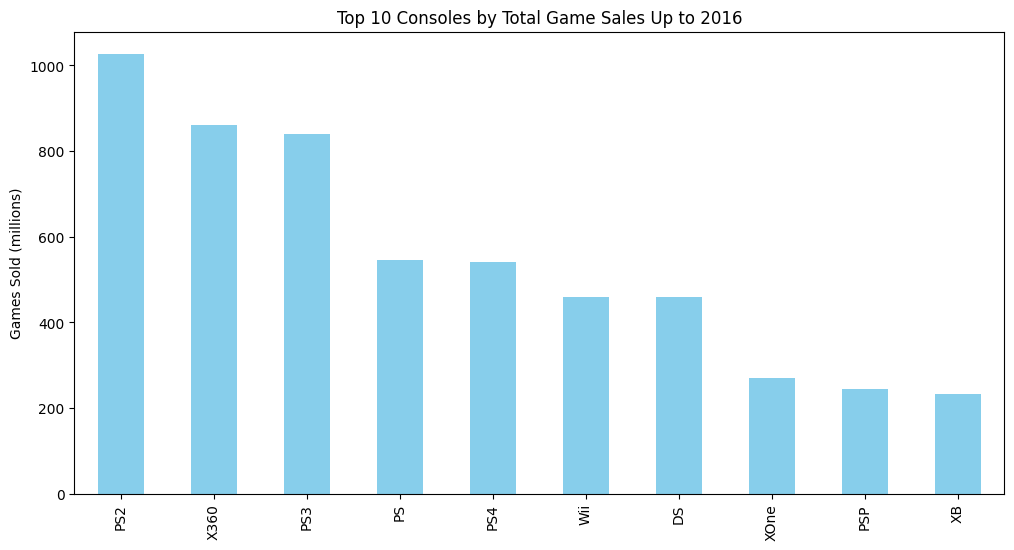

In [25]:
#Create a bar plot to show which console has sold the most games of all time (Up to 2016)
#This code uses the vgchartz-2024 dataset from Kaggle, which contains video game sales data.

import pandas as pd
import matplotlib.pyplot as plt
import kagglehub

# Download the dataset from Kaggle

path = kagglehub.dataset_download("hosammhmdali/video-game-sales-2024")
csv_file = path + '/vgchartz-2024.csv'

#Create a DataFrame from the CSV file
df = pd.read_csv(csv_file)

#Clean the data and remove rows with missing values in 'console' and 'total_sales' columns
clean_df = df.dropna(subset=['console', 'total_sales'])

#Create a variable that adds up the total sales of all games for each console 
platform_sales = clean_df.groupby('console')['total_sales'].sum().sort_values(ascending=False)

#Create a bar plot to show the total game sales of each console
top_10_consoles = platform_sales.head(10)
top_10_consoles.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Top 10 Consoles by Total Game Sales Up to 2016')
plt.ylabel('Games Sold (millions)')
plt.xlabel('')
plt.show()




/var/folders/6r/12b544xs5p1_hrrd12scdl3r0000gn/T/ipykernel_21149/4289128977.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps2_data['release_date'] = pd.to_datetime(ps2_data['release_date'], format='%Y-%m-%d', errors='coerce')


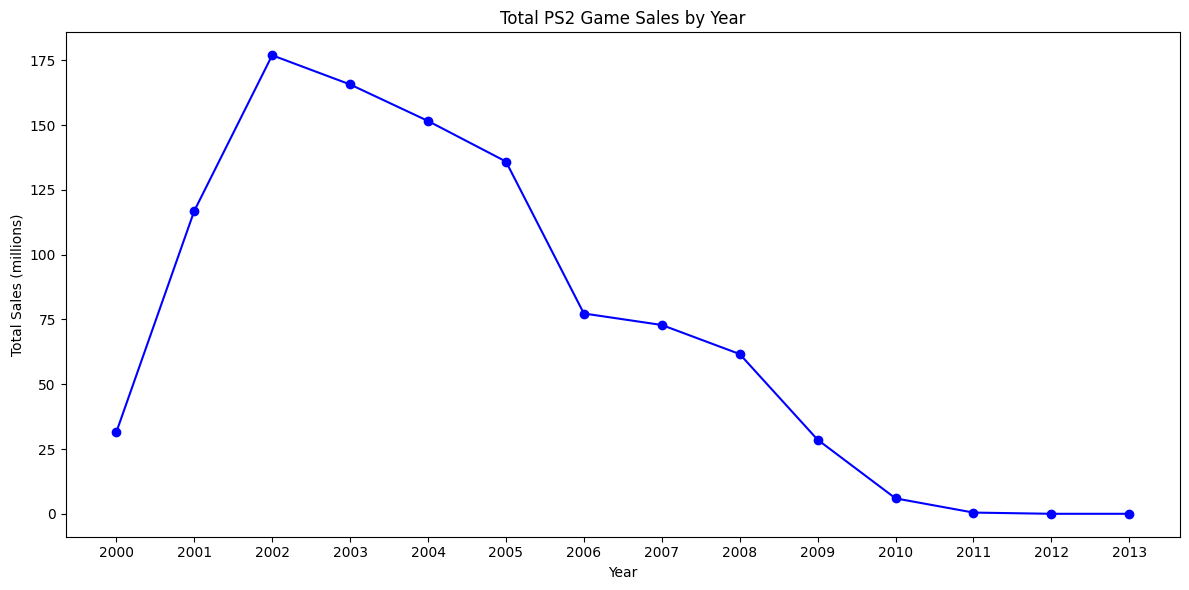

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub

# Download the dataset from Kaggle

path = kagglehub.dataset_download("hosammhmdali/video-game-sales-2024")
csv_file = path + '/vgchartz-2024.csv'

#Create a DataFrame from the CSV file
df = pd.read_csv(csv_file)

#Create a variable for PS2 game sales, and scrub any data that's missing the year
ps2_data = df[(df['console'] == 'PS2') & (df['release_date'].notna())]

#We learned that the release_date data includes, day, month, and year, so we need to convert it to just the year
ps2_data['release_date'] = pd.to_datetime(ps2_data['release_date'], format='%Y-%m-%d', errors='coerce')

#We also learned that some data points have ps2 games purchased after 2016. Since the data set was for 
#       games sold up to 2016, these are probably an error. I need to remove those.
ps2_data = ps2_data[ps2_data['release_date'].dt.year < 2016]

#using errors='coerce' will convert any invalid dates to NaT, so we need to clean those up
ps2_data = ps2_data.dropna(subset=['release_date'])

#We need to obtain the year from the release_date column, so we can group by year
ps2_data['release_year'] = ps2_data['release_date'].dt.year

#Then group by release_year instead of release_date
ps2_sales_by_year = ps2_data.groupby('release_year')['total_sales'].sum()


#Create a line plot to show the total game sales of PS2 games by year
plt.figure(figsize=(12, 6))
plt.plot(ps2_sales_by_year.index, ps2_sales_by_year.values, marker='o', color='blue')
plt.title('Total PS2 Game Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.xticks(ticks=ps2_sales_by_year.index)
plt.tight_layout()
plt.show()
